# Introduction

In this notebook we aim to assess whether the TCR contact positions move more than the rest of the MHC molecule or peptide.

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind

In [2]:
NOISE_LEVEL = 0.5 # Å

In [3]:
results = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/pmhc_tcr_contact_apo_holo.csv')
results

,complex_id,structure_x_name,structure_y_name,chain_type,tcr_contact,rmsd
0,3qdg_D-E-C-A-B_tcr_pmhc,1jf1_A-B-C_pmhc.pdb,3qdg_D-E-C-A-B_tcr_pmhc.pdb,mhc_chain1,False,0.630013
1,3qdg_D-E-C-A-B_tcr_pmhc,1jf1_A-B-C_pmhc.pdb,3qdg_D-E-C-A-B_tcr_pmhc.pdb,mhc_chain1,True,0.582077
2,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,antigen_chain,False,0.349159
3,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,mhc_chain1,False,0.306333
4,7ow6_D-E-C-A-B_tcr_pmhc,7ow4_A-B-C_pmhc.pdb,7ow4_D-E-F_pmhc.pdb,mhc_chain1,True,0.265103
...,...,...,...,...,...,...
1989,7rtr_D-E-C-A-B_tcr_pmhc,7p3d_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,mhc_chain1,False,0.497769
1990,7rtr_D-E-C-A-B_tcr_pmhc,7p3d_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,mhc_chain1,True,0.458372
1991,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,antigen_chain,False,0.455078
1992,7rtr_D-E-C-A-B_tcr_pmhc,7rtd_A-B-C_pmhc.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,mhc_chain1,False,0.449558


In [4]:
apo_holo_summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
apo_holo_summary_df

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
0,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
2,1bii_A-B-P_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
3,1ddh_A-B-P_pmhc.pdb,1ddh,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
4,1duz_A-B-C_pmhc.pdb,1duz,pmhc,apo,NaN,NaN,C,A,B,NaN,LLFGYPVYV,hla_a_02_01
...,...,...,...,...,...,...,...,...,...,...,...,...
353,8gon_D-E-C-A-B_tcr_pmhc.pdb,8gon,tcr_pmhc,holo,D,E,C,A,B,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
354,8gop_A-B_tcr.pdb,8gop,tcr,apo,A,B,NaN,NaN,NaN,TSESDYY-QEAYKQQN-ASSGNTPLV-SGHNS-FNNNVP-ASTWGR...,NaN,NaN
355,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02
356,8gvg_A-B-P-H-L_tcr_pmhc.pdb,8gvg,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RFPLTFGW,hla_a_24_02


In [5]:
apo_holo_summary_df['ids'] = apo_holo_summary_df['file_name'].str.replace('.pdb$', '')

/var/scratch/bmcmaste/1355136/ipykernel_3353000/477882467.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  apo_holo_summary_df['ids'] = apo_holo_summary_df['file_name'].str.replace('.pdb$', '')


In [6]:
results = results.merge(apo_holo_summary_df[['ids', 'cdr_sequences_collated', 'peptide_sequence', 'mhc_slug']],
                        left_on='complex_id',
                        right_on='ids',
                        how='left')

In [7]:
results = results.merge(
    apo_holo_summary_df[['file_name', 'pdb_id', 'structure_type', 'state']],
    how='left',
    left_on='structure_x_name',
    right_on='file_name',
).merge(
    apo_holo_summary_df[['file_name', 'pdb_id', 'structure_type', 'state']],
    how='left',
    left_on='structure_y_name',
    right_on='file_name',
)

In [8]:
def name_domain(chain_type: str, tcr_contact: bool) -> str:
    match chain_type:
        case 'antigen_chain':
            return 'peptide'
        
        case 'mhc_chain1':
            if tcr_contact:
                return 'mhc_tcr_contact'
            
            return 'mhc'

results['domain'] = results.apply(lambda row: name_domain(row.chain_type, row.tcr_contact), axis='columns')

In [9]:
results['comparison'] = results['state_x'] + '-' + results['state_y']
results['comparison'] = results['comparison'].map(lambda entry: 'apo-holo' if entry == 'holo-apo' else entry)

In [10]:
results['structure_comparison'] = results.apply(
    lambda row: '-'.join(sorted([row.structure_x_name, row.structure_y_name])),
    axis='columns',
)
results = results.drop_duplicates(['structure_comparison', 'domain'])

In [11]:
results = results.groupby(['peptide_sequence',
                           'mhc_slug',
                           'comparison',
                           'domain'], dropna=False)['rmsd'].mean().reset_index()

In [12]:
apo_holo_results = results.query("comparison == 'apo-holo'")

In [13]:
apo_holo_results

,peptide_sequence,mhc_slug,comparison,domain,rmsd
3,AAGIGILTV,hla_a_02_01,apo-holo,mhc,0.660376
4,AAGIGILTV,hla_a_02_01,apo-holo,mhc_tcr_contact,0.562211
5,AAGIGILTV,hla_a_02_01,apo-holo,peptide,1.025622
6,ALHGGWTTK,hla_a_03_01,apo-holo,mhc,0.442792
7,ALHGGWTTK,hla_a_03_01,apo-holo,mhc_tcr_contact,0.990352
...,...,...,...,...,...
282,YGFRNVVHI,h2_db,apo-holo,mhc_tcr_contact,0.829133
283,YGFRNVVHI,h2_db,apo-holo,peptide,0.275006
287,YLQPRTFLL,hla_a_02_01,apo-holo,mhc,0.647465
288,YLQPRTFLL,hla_a_02_01,apo-holo,mhc_tcr_contact,0.476928


# Visualise results

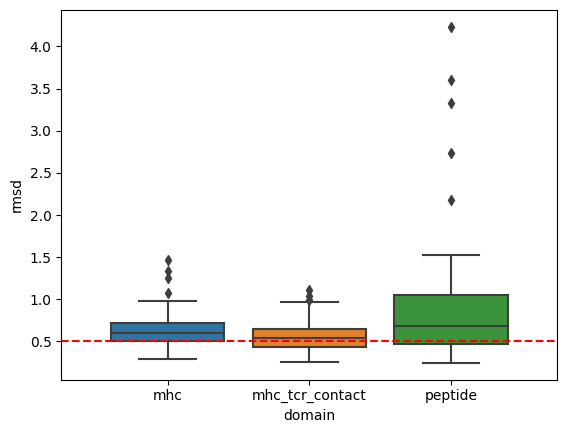

In [14]:
sns.boxplot(apo_holo_results, x='domain', y='rmsd')

x = np.linspace(-0.75, 2.75)
y = np.repeat(NOISE_LEVEL, len(x))

plt.plot(x, y, '--r')
plt.xlim(-0.75, 2.75)

plt.savefig('../report/figures/pmhc_movement_by_component.svg')

# Compute Statistics

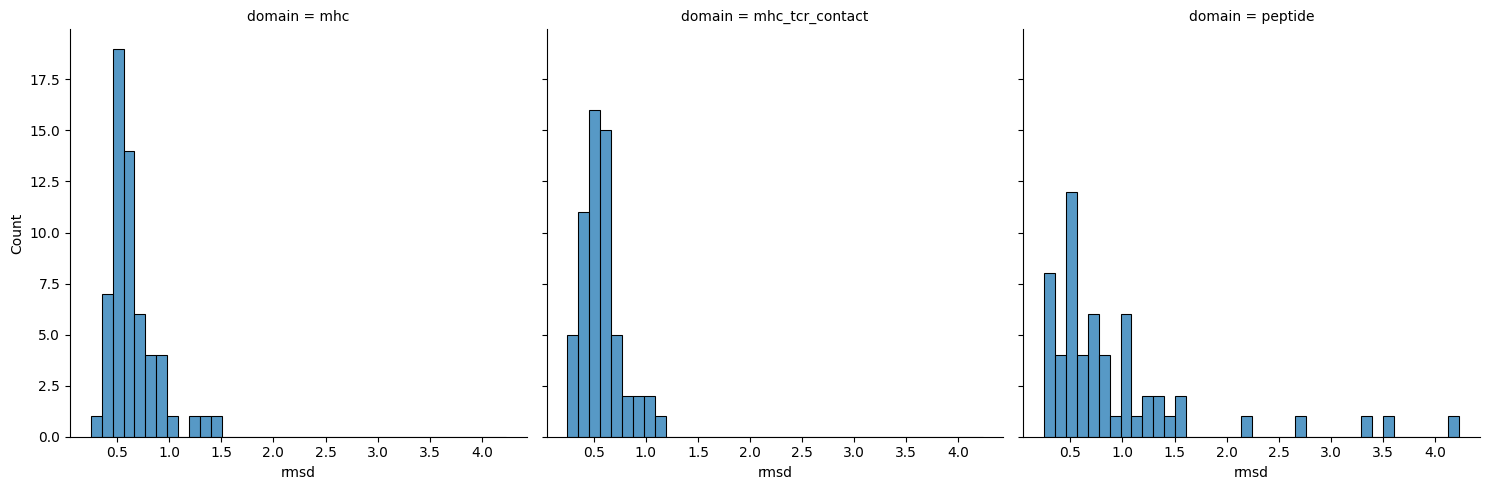

In [15]:
sns.displot(apo_holo_results, x='rmsd', col='domain')

In [16]:
conditions = {domain: apo_holo_results[apo_holo_results['domain'] == domain]['rmsd'].values for domain in apo_holo_results['domain'].unique()}

In [17]:
f_oneway(*conditions.values())

F_onewayResult(statistic=8.43958931017577, pvalue=0.0003181981364846825)

In [18]:
combos = list(itertools.combinations(conditions.items(), 2))

significane_level = 0.05 / len(combos)

ad_hoc_results = {'condition_x': [], 'condition_y': [], 'stat': [], 'p_val': []}
for (condition_x_name, condition_x), (condition_y_name, condition_y) in combos:
    ad_hoc_results['condition_x'].append(condition_x_name)
    ad_hoc_results['condition_y'].append(condition_y_name)
    
    stat, p_val = ttest_ind(condition_x, condition_y)
    
    ad_hoc_results['stat'].append(stat)
    ad_hoc_results['p_val'].append(p_val)

ad_hoc_results = pd.DataFrame(ad_hoc_results)

ad_hoc_results['significant'] = ad_hoc_results['p_val'] < significane_level

ad_hoc_results

,condition_x,condition_y,stat,p_val,significant
0,mhc,mhc_tcr_contact,2.116838,0.036411,False
1,mhc,peptide,-2.531661,0.012702,True
2,mhc_tcr_contact,peptide,-3.322653,0.001196,True


Based on these results it seems that the peptide undergoes conformational change but not the MHC molecule either contacting the TCR or not.